In [1]:
import matplotlib.pyplot as plt
import MDAnalysis as mda
import numpy as np
from matplotlib.markers import MarkerStyle as markerstyle
import math
from scipy.interpolate import griddata
import pandas
from scipy import constants
import matplotlib.patches as patches
import matplotlib.cm as cm
import seaborn as sns

In [2]:
dist_file = "../3D_Martini2/Final_data_100NaCl.txt"
dist_data = pandas.read_csv(dist_file,comment='#',sep='\t',dtype=np.float64)   #Distance file
#Remove duplicates 
dist_data3D = dist_data.drop_duplicates(subset=['Timestep'],ignore_index=True)

In [3]:
com_file = "../2D_Martini2/Delta_Z_measurements.txt"
dz_data = pandas.read_csv(com_file,comment='#',sep='\t')

dist_data2D = dz_data.drop_duplicates(subset=['Timestep'],ignore_index=True)


In [4]:
dist_file = "../PseudoMart2/Final_data.txt"

dist_data = pandas.read_csv(dist_file,comment='#',sep='\t',dtype=np.float64)   #Distance file
#Remove duplicates 
dist_data_pseudo = dist_data.drop_duplicates(subset=['Timestep'],ignore_index=True)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

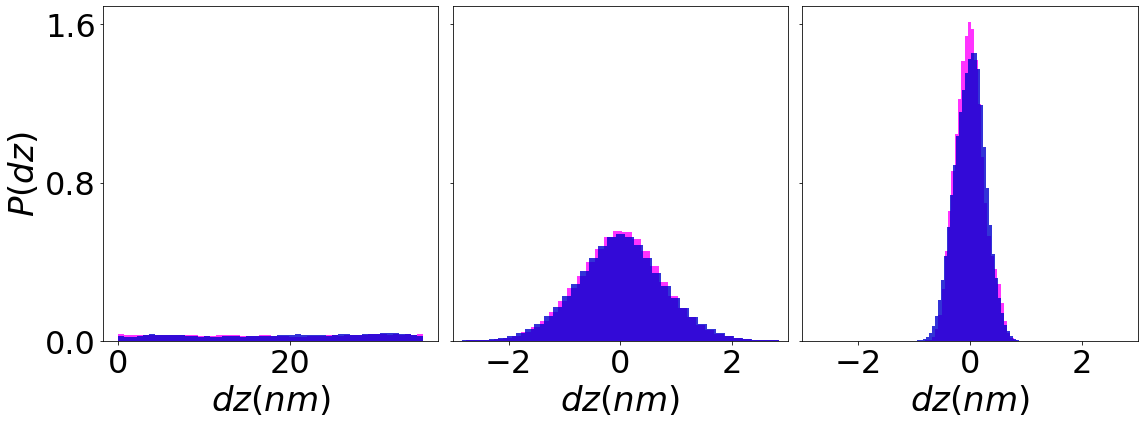

In [13]:
fig,ax = plt.subplots(1,3,figsize=(16,6),sharey=True)

nbins=50
al=0.8
f_size=34
t_size = 32
leg_size=20

cl2 = 'mediumblue'
cl1='magenta'

meanA_3D = dist_data3D['comZ_chainA'].mean()
meanB_3D = dist_data3D['comZ_chainA'].mean()
                #     lipid_groups_z.append(upp_leaf[l].position[2])
                # elif leaf_flag =='low':
                #     lipid_groups_z.append(low_leaf[l].pos

meanA_2D = dist_data2D['dz_xy_Aupp'].mean()
meanB_2D = dist_data2D['dz_xy_Bupp'].mean()

meanA_pseudo = dist_data_pseudo['comZ_chainA'].mean()
meanB_pseudo = dist_data_pseudo['comZ_chainB'].mean()

# meanA_pseudo = dist_data_pseudo['COMz_chainA'].mean()
# meanB_pseudo = dist_data_pseudo['COMz_chainB'].mean()

#Plot 3D data
ax[0].hist(dist_data3D['comZ_chainA'],bins=nbins,density=True,alpha=al,color=cl1)
ax[0].hist(dist_data3D['comZ_chainB'],bins=nbins,density=True,alpha=al,color=cl2)
# ax[0].ticklabel_format(axis='y',style='sci',scilimits=(-1,0))
# ax[0].set_yticks([0,0.02,0.04])

ax[1].hist(dist_data2D['dz_xy_Aupp'] - meanA_2D,bins=nbins,density=True,alpha=al,color=cl1,label='chainA');
ax[1].hist(dist_data2D['dz_xy_Bupp'] - meanB_2D,bins=nbins,density=True,alpha=al,color=cl2,label='chainB');

ax[2].hist(dist_data_pseudo['comZ_chainA']-meanA_pseudo,bins=nbins,density=True,alpha=al,color=cl1,label='chainA');
ax[2].hist(dist_data_pseudo['comZ_chainB']-meanB_pseudo,bins=nbins,density=True,alpha=al,color=cl2,label='chainB');

# ax[1].legend(fontsize=leg_size,frameon=False,loc='upper right')
ax[1].set_yticks([0,0.8,1.6])
ax[0].set_ylabel(r'$ P(dz)$',fontsize=f_size)
for ax_ in ax:
    ax_.set_xlabel(r'$ dz (nm)$',fontsize=f_size)
    # ax_.set_ylabel(r'$ P(\Theta)$',fontsize=f_size)
    ax_.tick_params(axis='both',labelsize=t_size)
# ax[0].set_xlim(-3.0,3.0)
# ax[1].set_xlim(-3.0,3.0)
ax[1].set_xlim(-3.0,3.0)
ax[2].set_xlim(-3.0,3.0)
ax[1].set_xticks([-2.0,0,2.0])
ax[2].set_xticks([-2.0,0,2.0])
fig.tight_layout()

plt.savefig('dz_MART2_FINAL.eps', dpi=600,format='eps',transparent=True)
plt.savefig('dz_MART2_FINAL.png', dpi=600,format='png',transparent=True)


Text(0, 0.5, 'dz (nm)')

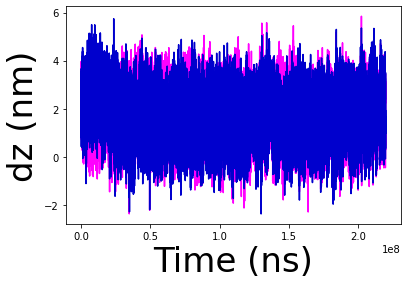

In [7]:
fig,ax = plt.subplots()

ax.plot(dist_data2D['Timestep'],dist_data2D['dz_xy_Aupp'],color=cl1,label='chainA')
ax.plot(dist_data2D['Timestep'],dist_data2D['dz_xy_Bupp'],color=cl2,label='chainB')

ax.set_xlabel('Time (ns)',fontsize=f_size)
ax.set_ylabel("dz (nm)",fontsize=f_size)